In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
subreddit_name = 'the_donald'

In [19]:
# Remember, X = WH
# W = document - latent
# H = latent - term

data = pd.read_csv('data/bigquery/{}.csv'.format(subreddit_name))
H = np.load('data/nmf/{}/H_{}.npy'.format(subreddit_name, subreddit_name))
W = np.load('data/nmf/{}/W_{}.npy'.format(subreddit_name, subreddit_name))
feature_names = np.load(
    'data/nmf/{}/feature_names_{}.npy'.format(subreddit_name, subreddit_name))

In [20]:
# For a single subreddit...

classifs = W.argmax(axis=1)
tot_comments = W.shape[0]

mat = np.zeros([H.shape[0]])
for i in range(H.shape[0]):
    mat[i] = sum(classifs == i) / tot_comments

df = pd.DataFrame(data=np.atleast_2d(mat),
                  index=[subreddit_name],
                  columns=['Cluster {}'.format(i) for i in range(H.shape[0])])

In [21]:
for topic_idx, topic in enumerate(H):
    print("Cluster {}:".format(topic_idx))
    print(feature_names[topic.argsort()[:-15-1:-1]])
    print('')

Cluster 0:
['good' 'leave' 'point' 'kid' 'live' 'lot' 'day' 'school' 'feel' 'wrong'
 'child' 'bad' 'guy' 'liberal' 'job']

Cluster 1:
['brick' 'centipede' 'wall' 'brownsville' 'imperial' 'beach' 'mile' 'wide'
 'texas' 'tomorrow' 'foot' 'goal' 'rate' 'build' 'unite']

Cluster 2:
['$' 'pay' 'cost' 'month' 'dollar' 'hour' 'buy' 'deduction' 'income'
 'house' 'worth' 'save' 'total' 'price' 'wage']

Cluster 3:
['=' 'watch?v' 'article' 'individual' '+' 'heart' 'recognize' 'bill' 'set'
 'law' 'degree' 'primary' 'base' 'rule' 'islam']

Cluster 4:
['trump' 'president' 'win' 'donald' 'obama' 'supporter' 'anti' 'support'
 'medium' 'campaign' 'election' 'candidate' 'maga' 'moore' 'tweet']

Cluster 5:
['tax' 'taxis' 'pay' 'cut' 'money' 'bill' 'income' 'deduction' 'business'
 'rate' 'high' 'increase' 'low' 'plan' 'reform']

Cluster 6:
['automatically' 'question' 'the_donald' 'remove' 'moderator'
 'compose/?to=/r' 'subreddit](/message' 'bot' 'contact' 'perform'
 'concern' 'action' 'reddit' 'link' 'pos

In [23]:
def black_color_func(word, font_size, position, orientation, random_state=None,
                     **kwargs):
    return "rgb(0, 0, 0)"

disc_mask = np.array(Image.open("blackdisc.jpeg"))

wc = WordCloud(font_path='OCR-A-Std-Regular.ttf',
               prefer_horizontal=1.0,
               background_color="white",
               mask=disc_mask,
               color_func=black_color_func)

Cluster 0:


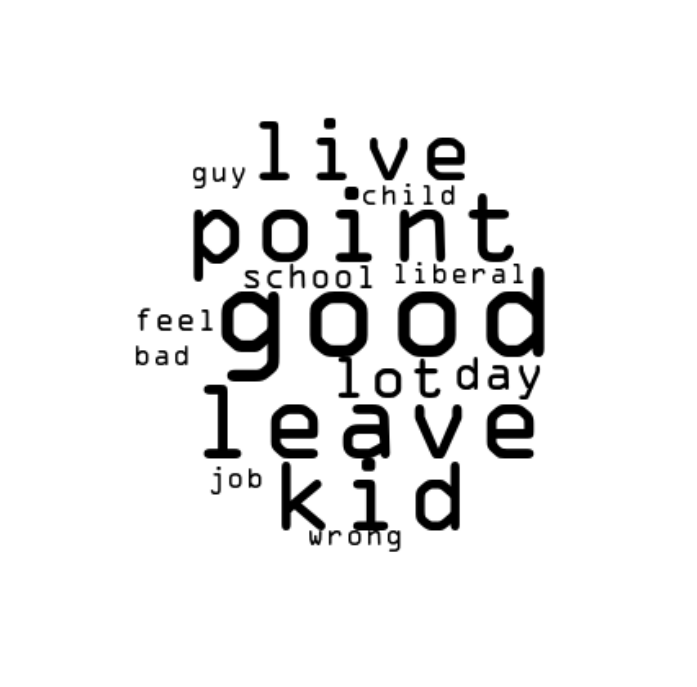

Cluster 1:


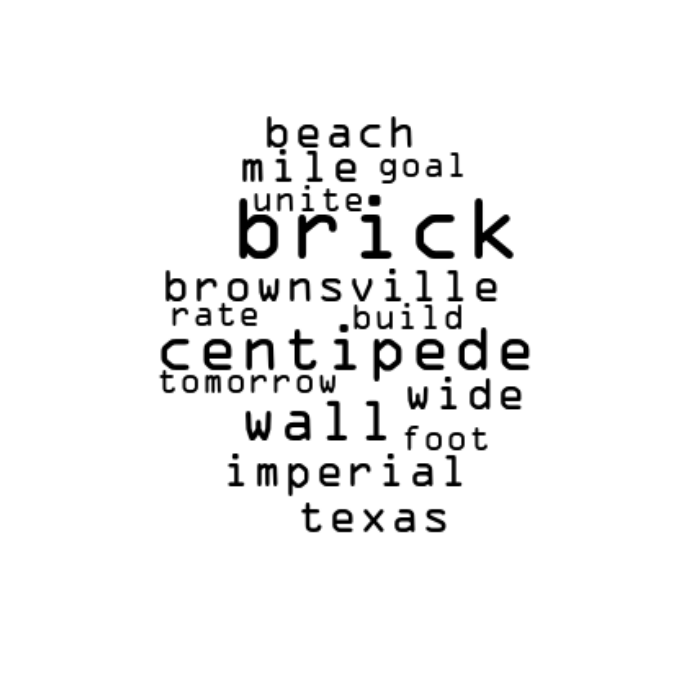

Cluster 2:


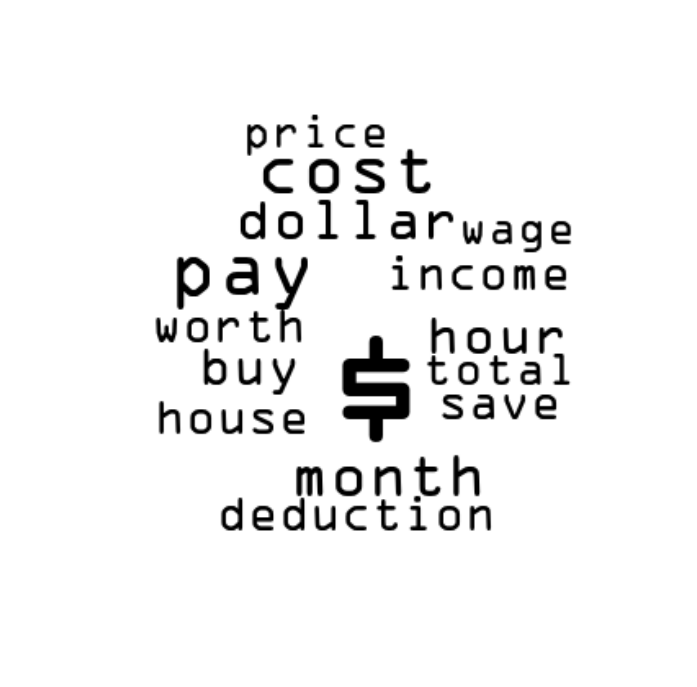

Cluster 3:


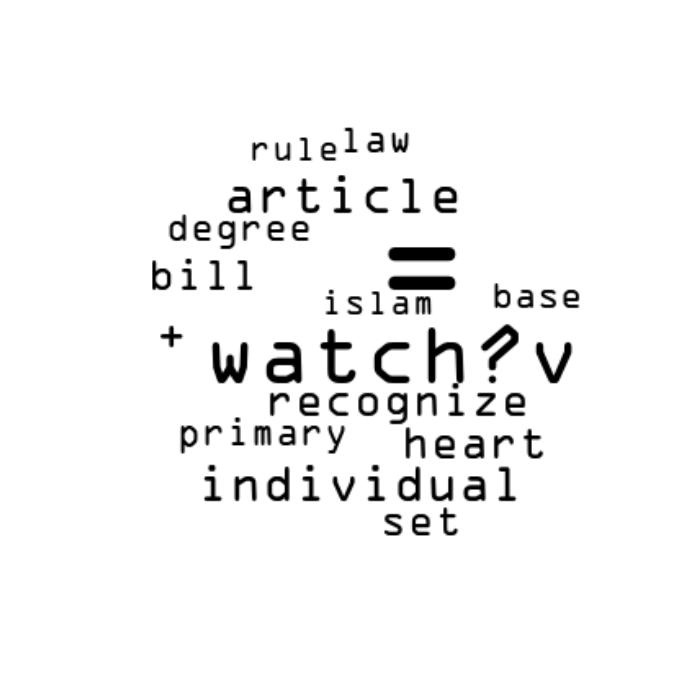

Cluster 4:


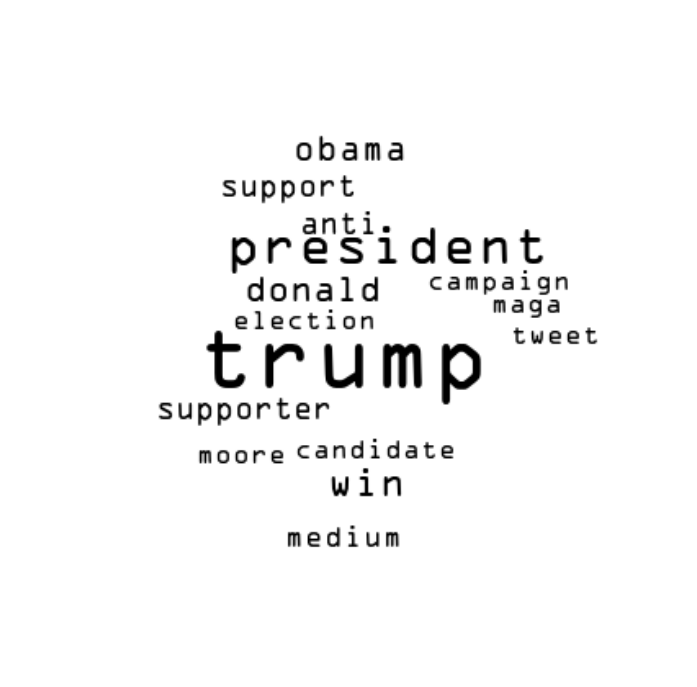

Cluster 5:


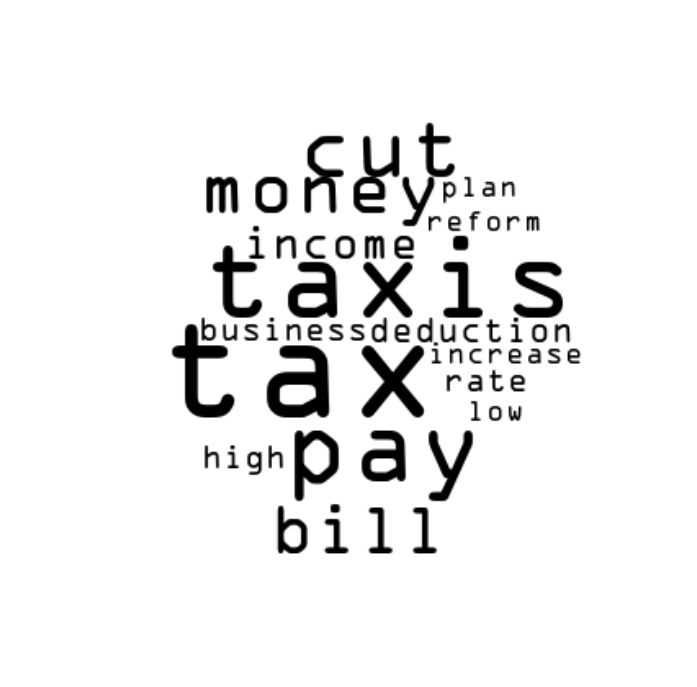

Cluster 6:


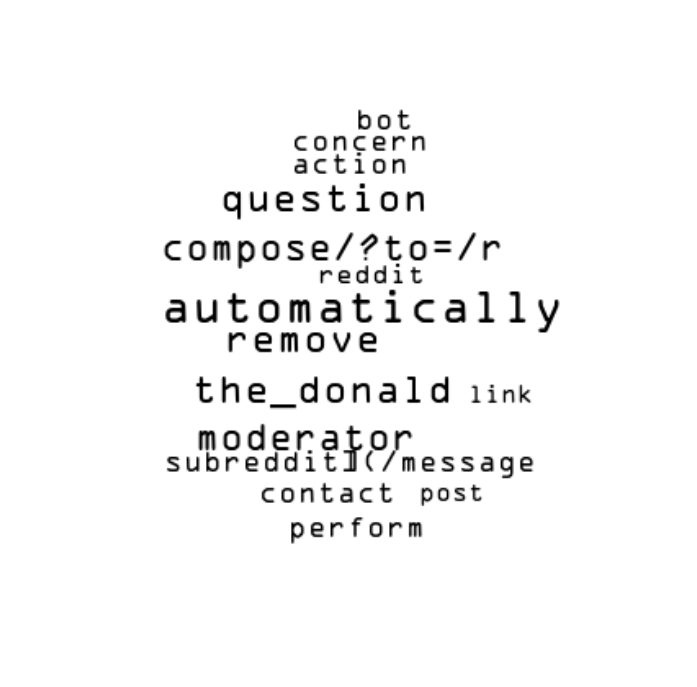

Cluster 7:


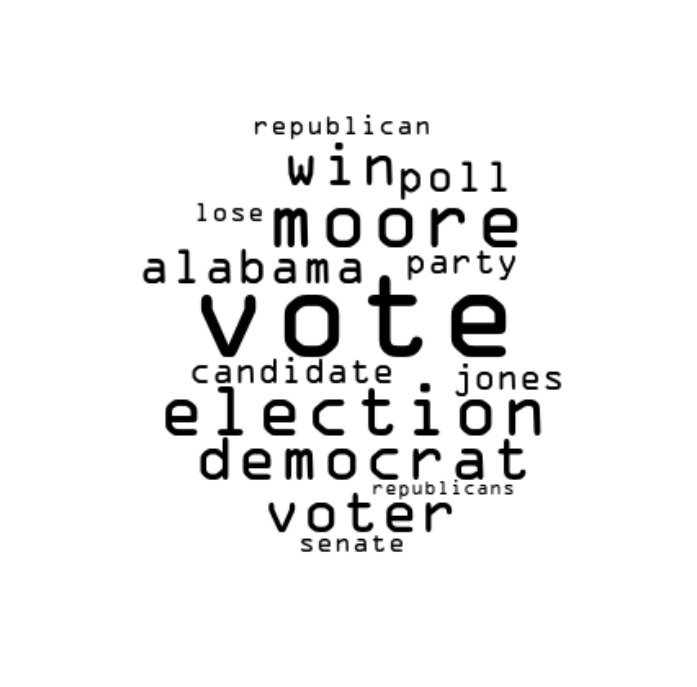

Cluster 8:


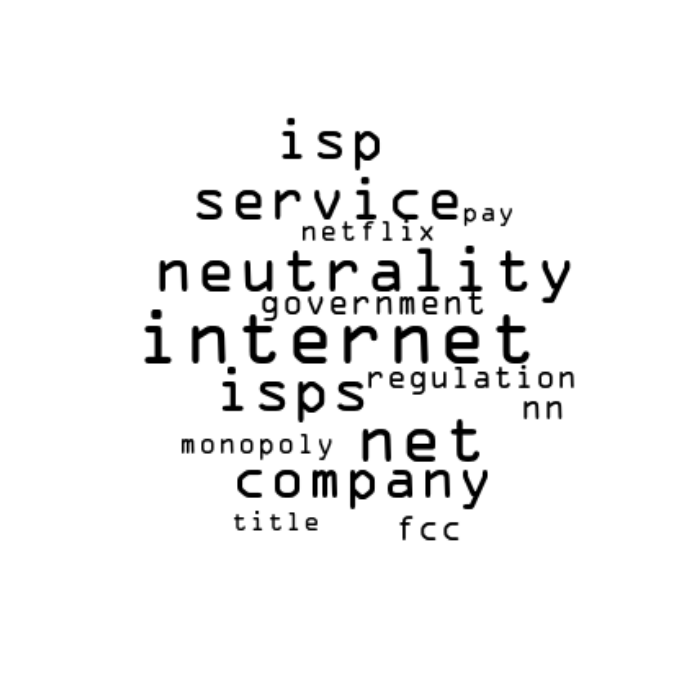

Cluster 9:


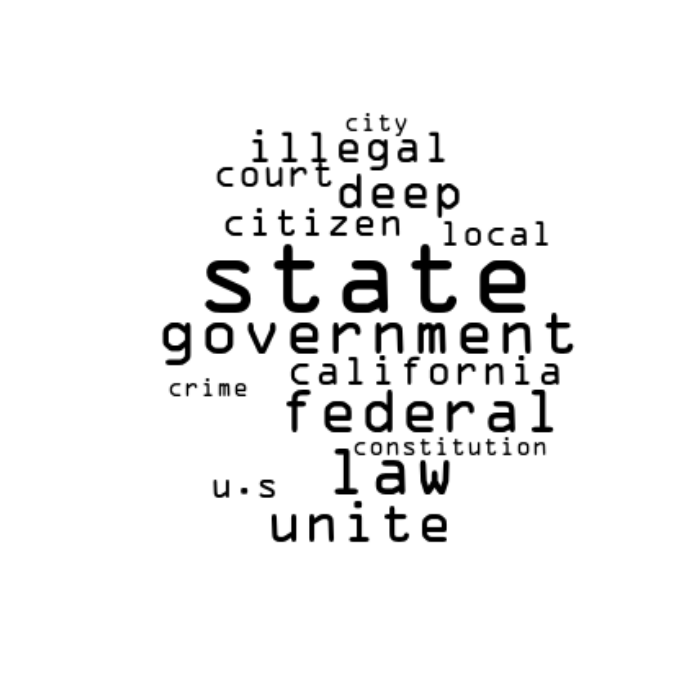

Cluster 10:


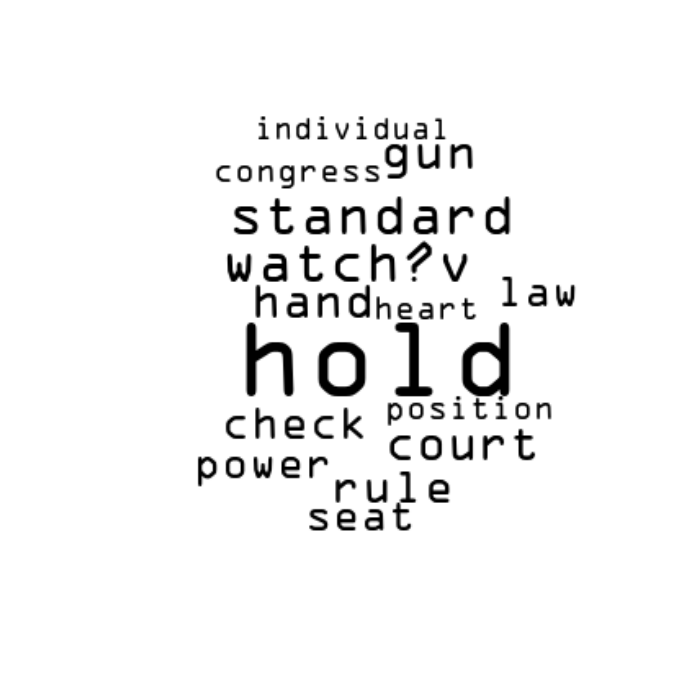

Cluster 11:


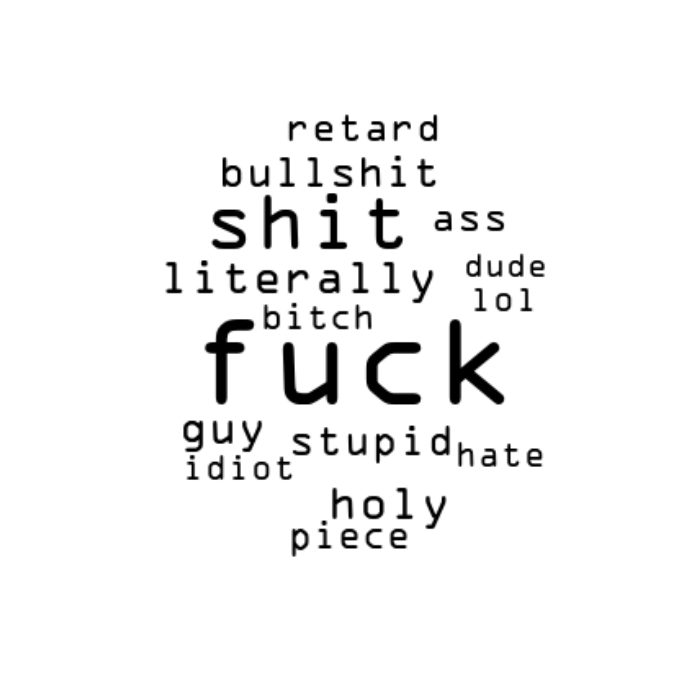

Cluster 12:


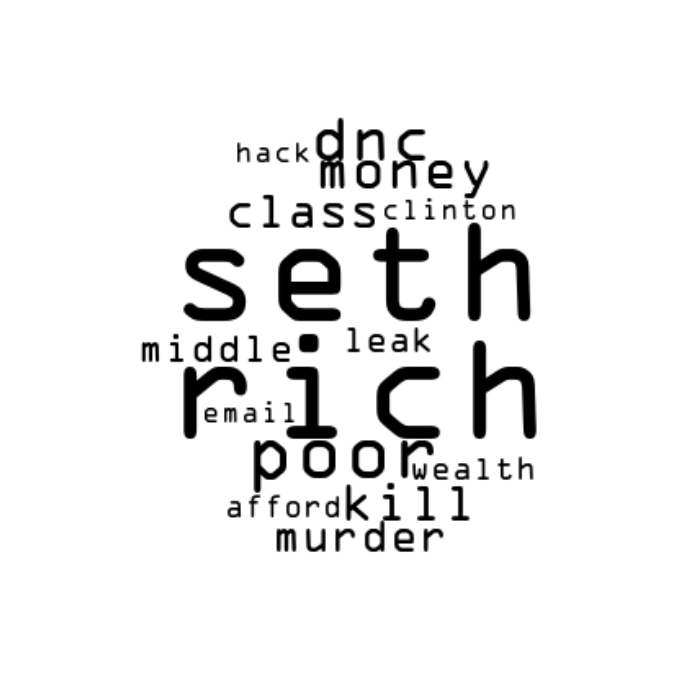

Cluster 13:


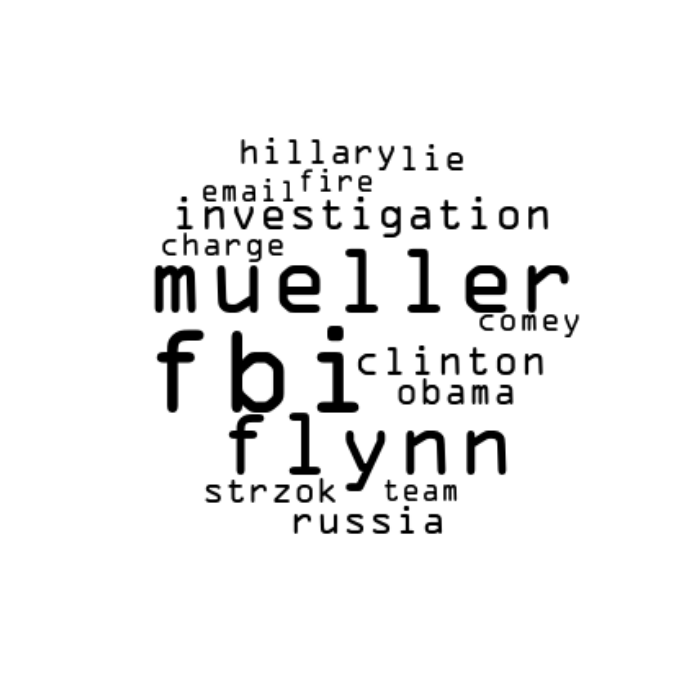

Cluster 14:


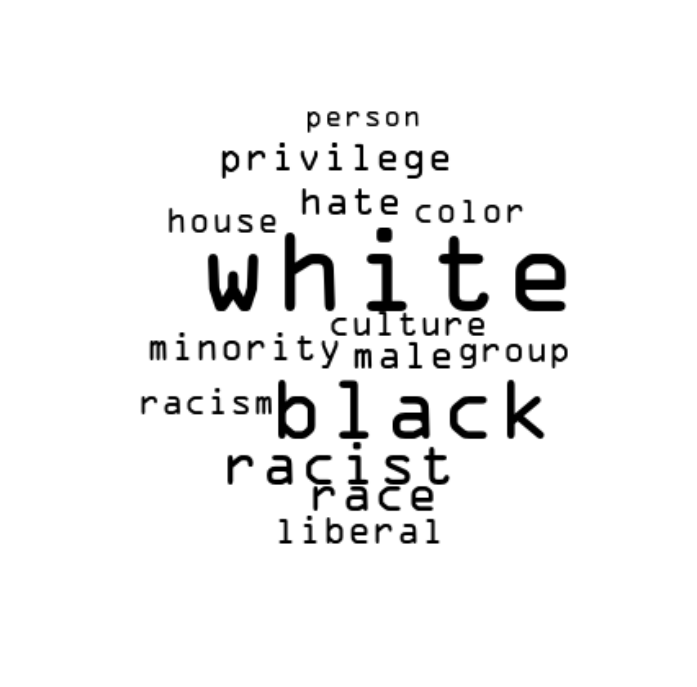

Cluster 15:


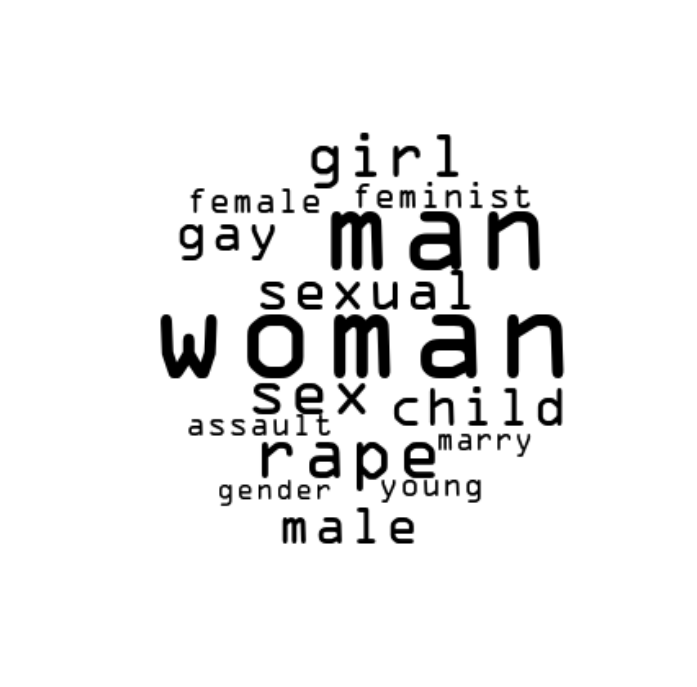

Cluster 16:


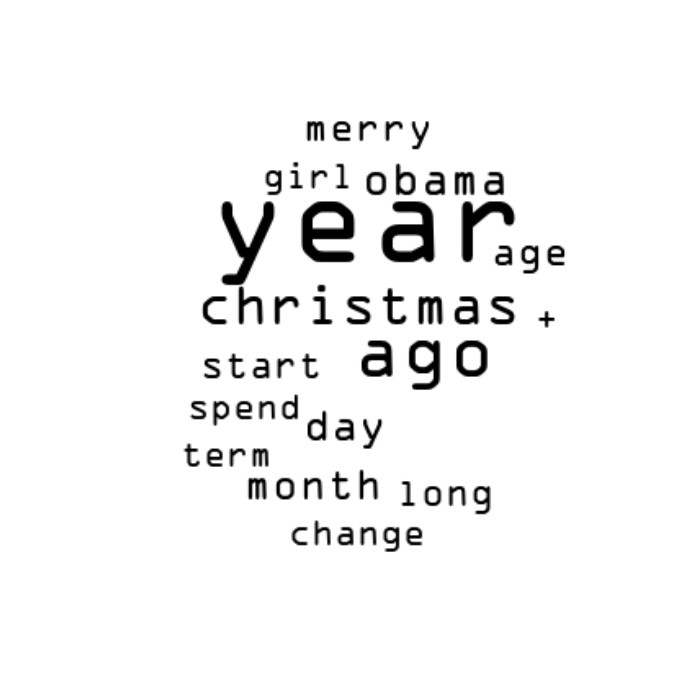

Cluster 17:


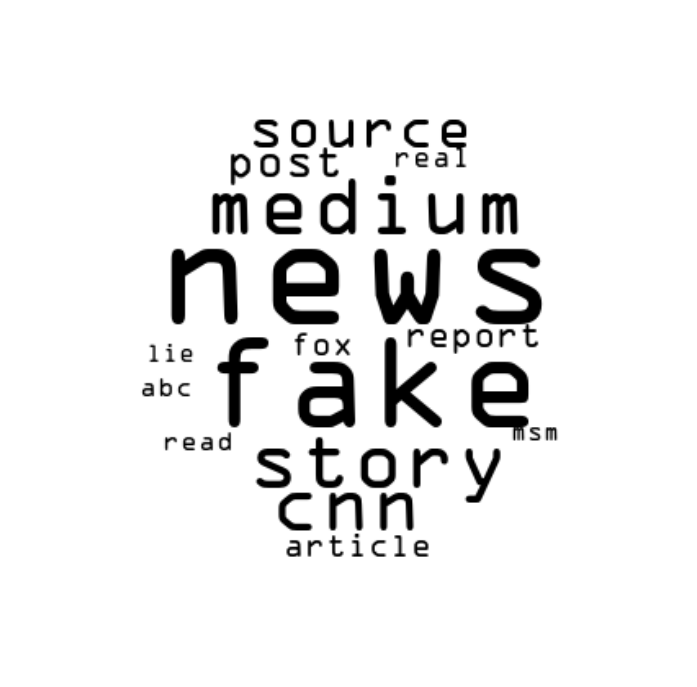

Cluster 18:


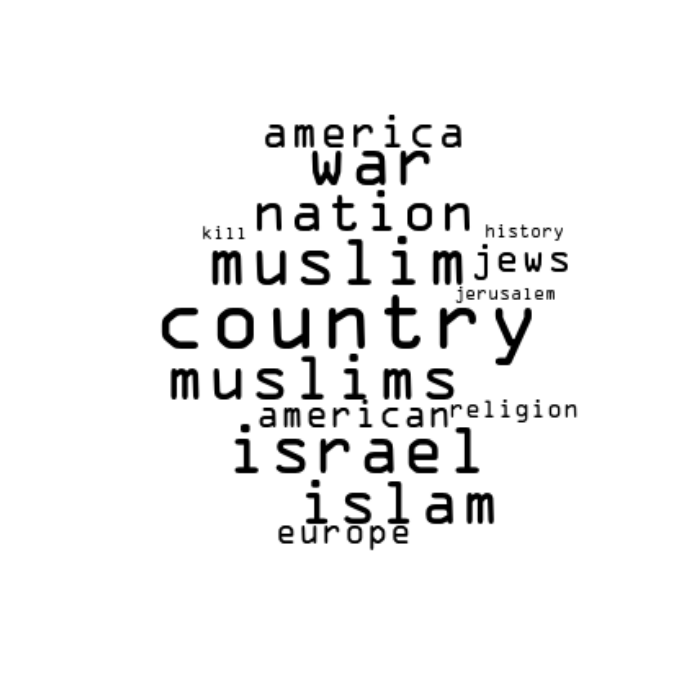

Cluster 19:


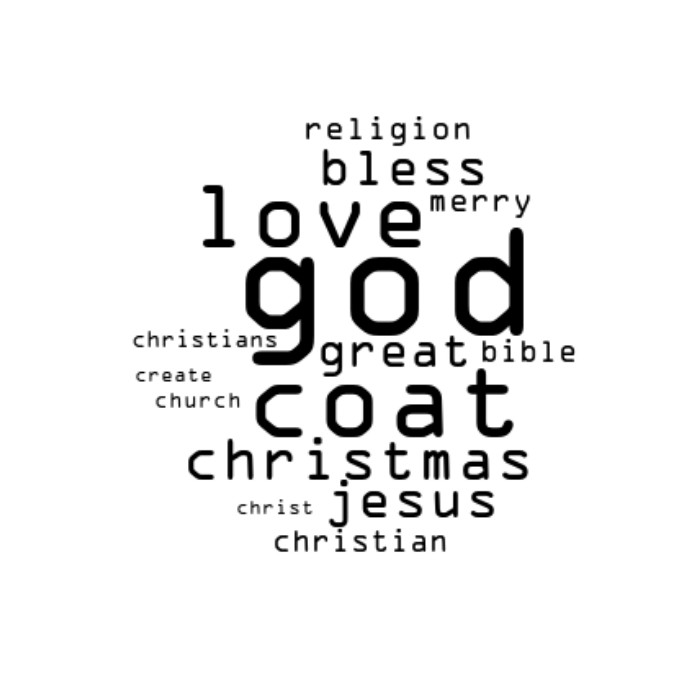

In [24]:
for topic_idx, topic in enumerate(H):
    print("Cluster {}:".format(topic_idx))
    
    d = {}
    for word_idx in topic.argsort()[:-15-1:-1]:
        d[feature_names[word_idx]] = topic[word_idx]
    
    wc.generate_from_frequencies(d)
    plt.subplots(figsize=[12, 12])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('{:0.2f}%.png'.format(100*df.loc[subreddit_name, 'Cluster {}'.format(topic_idx)]))
    plt.show()
    #print(feature_names[topic.argsort()[:-10-1:-1]])
    #print('')    

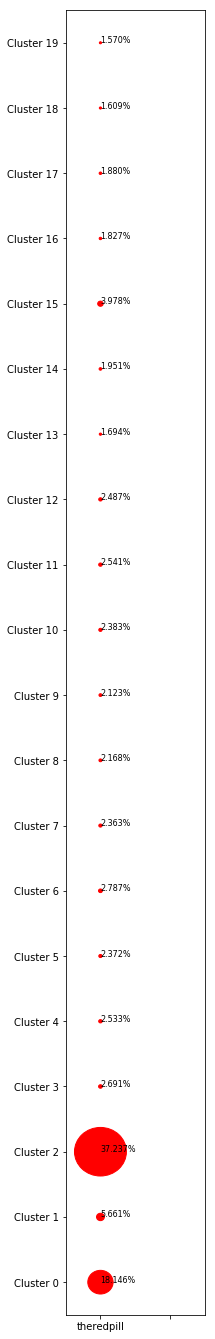

In [7]:
circles = np.empty(df.shape, dtype=object)

for i, row in enumerate(df.values):
    for j, num in enumerate(row):
        circles[i, j] = plt.Circle((i, j), num, color='r')

fig, ax = plt.subplots(figsize=[2.5, 24])

for i, row in enumerate(df.values):
    for j, num in enumerate(row):
        ax.add_artist(circles[i, j])
        plt.text(i, j, '{:.3f}%'.format(100*df.iloc[i, j]), fontsize=8)

plt.xticks(range(10))
plt.yticks(range(H.shape[1]))
ax.set_xticklabels(df.index)
ax.set_yticklabels(df.columns)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 19.5])
plt.show()

In [14]:
del H
del W
del feature_names